## This notebook trains on the full training data set and generates predictions for the unlabeled test set. Writes predictions to a csv file that is able to be evaluated by Kaggle.

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier

# Set the randomizer seed so results are the same each time
np.random.seed(0)

In [2]:
# import training data from relative filepath
# data = pd.read_csv("../../data/train.csv")

# import bootstrapped data from relative filepath
data = pd.read_csv("../../data/Bootstrapped Data/bootstrapped_data.csv")

# extract training data except labels and ID column
train_df = data.loc[:, (data.columns != "Cover_Type") & (data.columns != "Id")]

# extract labels from training data
train_labels_df = data.loc[:, "Cover_Type"]

train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2755,320,4,30,-1,2890,209,236,165,5468,...,0,0,0,0,0,0,0,0,0,0
1,2747,56,30,67,-6,150,224,162,51,1492,...,0,0,0,0,0,0,0,0,0,0
2,3105,350,7,90,12,5245,208,228,159,285,...,0,0,0,0,0,0,0,0,0,0
3,2305,119,18,458,11,1332,248,222,96,908,...,0,0,0,0,0,0,0,0,0,0
4,2562,59,3,0,0,1116,221,233,148,5091,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# import test data from relative filepath
test_data = pd.read_csv("../../data/test.csv")

# extract test data except ID column
test_df = test_data.loc[:, test_data.columns != "Id"]

test_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


### Feature engineering for NN

array([[<AxesSubplot:title={'center':'Hydrology_Ratio'}>]], dtype=object)

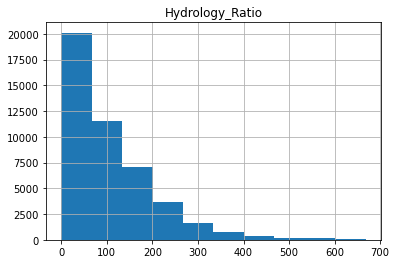

In [31]:
"""
train_df.loc[:, "Hydrology_Ratio"] = abs(train_df.loc[:, "Horizontal_Distance_To_Hydrology"].to_numpy()*
                              train_df.loc[:, "Vertical_Distance_To_Hydrology"].to_numpy())**0.5

test_df.loc[:, "Hydrology_Ratio"] = abs(test_df.loc[:, "Horizontal_Distance_To_Hydrology"].to_numpy()*
                              test_df.loc[:, "Vertical_Distance_To_Hydrology"].to_numpy())**0.5

train_df.hist(column = "Hydrology_Ratio")
"""

In [7]:
# number and structure of hidden layers
hidden_layer_sizes = tuple([100]*10)

# build classifier
classifier = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, 
                           early_stopping = True, alpha = 0.0001, 
                           activation = "relu", random_state = 1)

# fit classifier to training data
classifier.fit(train_df, train_labels_df)

# make predictions of test data
predictions = classifier.predict(test_df)

In [8]:
# converts predictions from np array to pd dataframe
predictions_df = pd.DataFrame(data = predictions, index = test_data.loc[:, "Id"], columns = ["Cover_Type"])

predictions_df

,Cover_Type
Id,
15121,2
15122,1
15123,2
15124,2
15125,1
...,...
581008,3
581009,3
581010,3


In [9]:
# outputs to csv file
predictions_df.to_csv("nn_predictions.csv")